In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

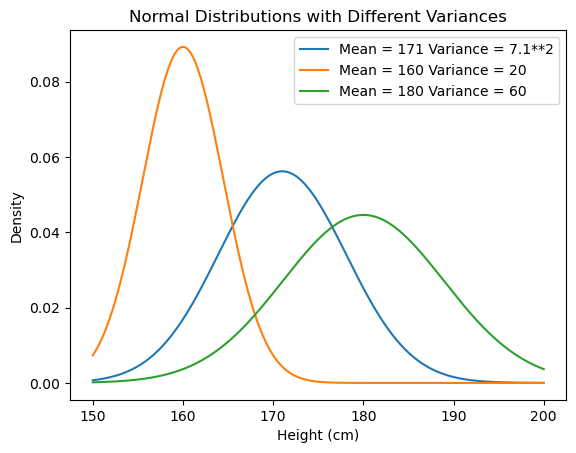

Probability of height between 162cm and 190cm: 0.8938


In [15]:
def normal_density(mean, variance, x):
    sigma = np.sqrt(variance)  # Standard deviation
    return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((x - mean)**2) / (2 * variance))

#Normal Distribution
x_values = np.linspace(150, 200, 1000)  # Generate 1000 points from 150cm to 200cm

# Compute distributions for different variances
y1 = normal_density(171, 7.1**2, x_values)  # Actual human height distribution
y2 = normal_density(160, 20, x_values)   # less spread out
y3 = normal_density(180, 80, x_values)    # more spread out

plt.plot(x_values, y1, label="Mean = 171 Variance = 7.1**2")
plt.plot(x_values, y2, label="Mean = 160 Variance = 20")
plt.plot(x_values, y3, label="Mean = 180 Variance = 60")

plt.legend()
plt.xlabel("Height (cm)")
plt.ylabel("Density")
plt.title("Normal Distributions with Different Variances")
plt.show()

def integration(mean, variance, a, b, num_points=1000):
    x_values = np.linspace(a, b, num_points)  # Generate points
    y_values = normal_density(mean, variance, x_values)  # Evaluate function
    
    dx = (b - a) / (num_points - 1)  # Step size
    integral = np.trapz(y_values, x_values)  # Approximate integral
    
    return integral

prob = integration(171, 7.1**2, 162, 190)
print(f"Probability of height between 162cm and 190cm: {prob:.4f}")


In [12]:
def uniform_expectation(a, b):
    return (a + b) / 2

# Example: Compute E[X] for a uniform distribution on [0, 10]
a = 0
b = 10
E_X_uniform = uniform_expectation(a, b)
print(f"Expected value E[X] for Uniform({a}, {b}): {E_X_uniform}")
print()

def exponential_expectation(lam):
    return 1 / lam

# Example: Compute E[X] for an exponential distribution with λ = 1/50
lam = 1/50
E_X_exponential = exponential_expectation(lam)
print(f"Expected value E[X] for Exp({lam}): {E_X_exponential}")
print("This confirms that the average time between pandemics is 50 years, which is expected.")
print()

def drug_dosage_expectation(mean, variance):
    def dosage_function(x):
        return 2.38 * x**2 * normal_density(mean, variance, x)
    
    result, _ = quad(dosage_function, -np.inf, np.inf)  # Integrate over all possible values
    return result

# Compute expectation
dosage = drug_dosage_expectation(171, 7.1**2)
print("Expected drug dosage:", dosage, "units")


Expected value E[X] for Uniform(0, 10): 5.0

Expected value E[X] for Exp(0.02): 50.0
This confirms that the average time between pandemics is 50 years, which is expected.

Expected drug dosage: 2.0653403981600308e-33 units
